# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [11]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [12]:
# - Mostrami le vendite maggiori di 10
print(sales[sales["sales"] > 10])

  employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020


In [ ]:
# - Mostrami i dati del 2018
print(sales[sales["year"] == 2018])

  employee  sales  year
0  Katrina     14  2018
3    Roman     12  2018


In [14]:
# - Mostrami le vendite maggiori di 13 e l'anno è il 2018
print(sales[sales["sales"] > 13][sales["year"] == 2018])

  employee  sales  year
0  Katrina     14  2018


C:\Users\acer\AppData\Local\Temp\ipykernel_11712\2308781755.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(sales[sales["sales"] > 13][sales["year"] == 2018])


In [18]:
# - Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018
print(sales[sales["sales"] <13][sales["year"] != 2018])

     employee  sales  year
2         Jan      6  2020
4  Jacqueline      8  2020
5       Paola      3  2019
6   Esperanza      7  2019
8      Egweyn      5  2020


C:\Users\acer\AppData\Local\Temp\ipykernel_11712\3788844144.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(sales[sales["sales"] <13][sales["year"] != 2018])


In [19]:
# - Mostrami i dati dove le vendite divise per 3 sono maggiori di 3
print(sales[sales["sales"] / 3 > 3])

  employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020


In [20]:
# - Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J
print(sales[sales['employee'] > 'J'])

     employee  sales  year
0     Katrina     14  2018
2         Jan      6  2020
3       Roman     12  2018
4  Jacqueline      8  2020
5       Paola      3  2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
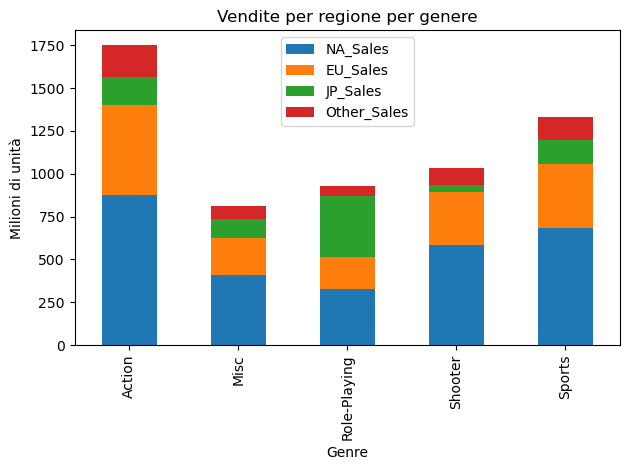


In [2]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
# 1. Quanti videogiochi sono stati pubblicati
print(f"Il numero totale di videogiochi pubblicati è: {df.shape[0]}")

Il numero totale di videogiochi pubblicati è: 16598


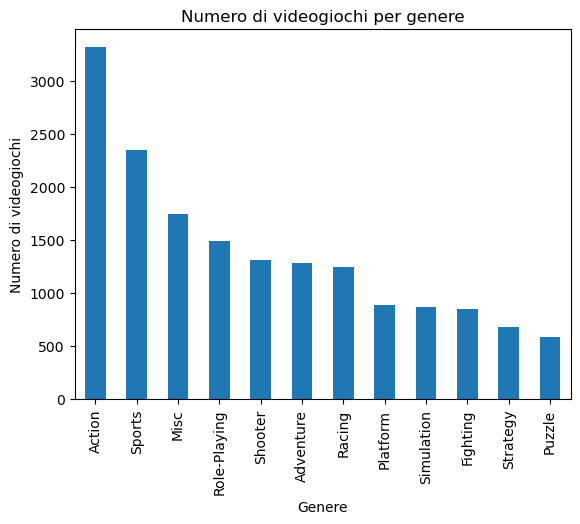

In [29]:
# 2. Quali sono i generi più popolari? Mostralo con un bar plot
df['Genre'].value_counts().plot(kind='bar')
plt.title('Numero di videogiochi per genere')
plt.xlabel('Genere')
plt.ylabel('Numero di videogiochi')
plt.show()

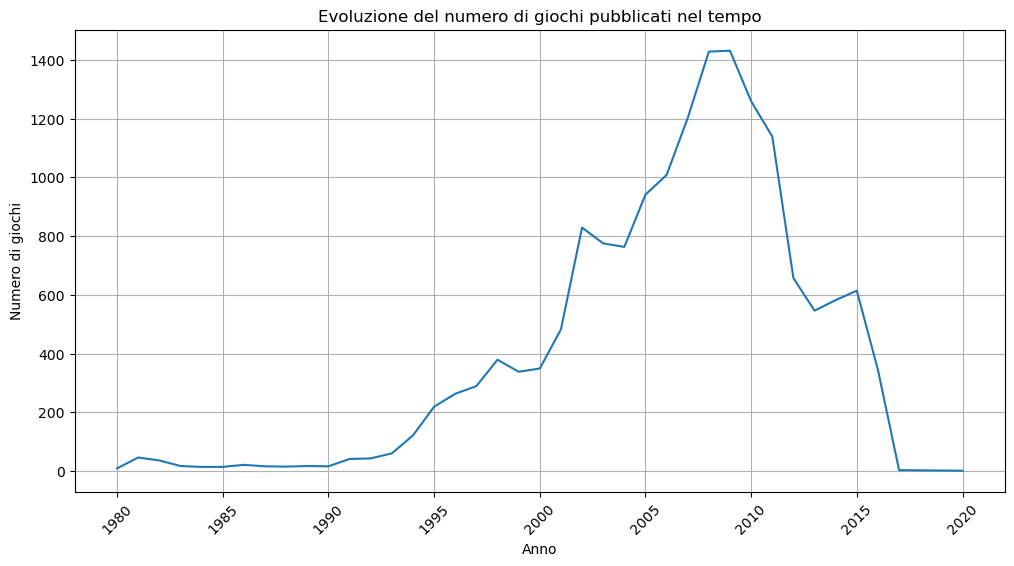

In [30]:
# 3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
# Utilizziamo il dataframe 'df' per i videogiochi pubblicati nel tempo
year_counts = df['Year'].dropna().astype(int).value_counts().sort_index()

plt.figure(figsize=(12, 6))
year_counts.plot(kind='line')
plt.title('Evoluzione del numero di giochi pubblicati nel tempo')
plt.xlabel('Anno')
plt.ylabel('Numero di giochi')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

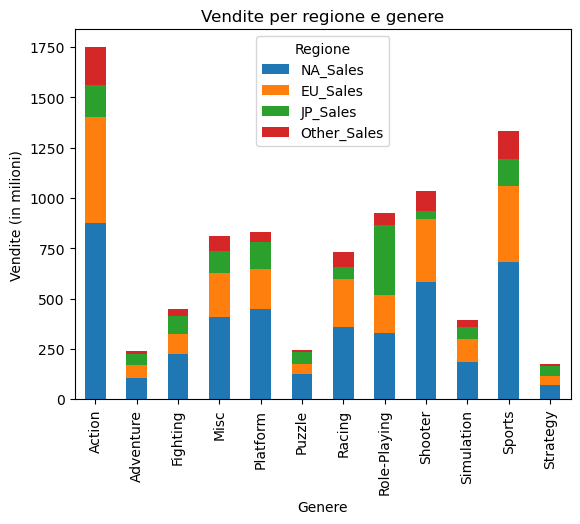

In [12]:
# vendite per regione e genere
# Creiamo un DataFrame con le vendite per regione e genere
sales_by_region_genre = df.groupby(['Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', "Other_Sales"]].sum().reset_index()
plt.figure(figsize=(12, 6))
sales_by_region_genre.plot(kind='bar', x='Genre', stacked=True)
plt.title('Vendite per regione e genere')
plt.xlabel('Genere')
plt.ylabel('Vendite (in milioni)')
plt.legend(title='Regione')
